# Usefull material:

Tipo de modelos de aprendizagem:

1. https://scikit-learn.org/stable/supervised_learning.html

Materiais de aprofundamento:

1. https://www.kaggle.com/
2. https://developers.google.com/machine-learning/testing-debugging?hl=pt-br
3. https://developers.google.com/machine-learning/problem-framing?hl=pt-br
4. https://developers.google.com/machine-learning/data-prep?utm_source=googleAI&utm_medium=card-image&utm_campaign=training-hub&utm_term&utm_content=data-prep&hl=pt-br

Cursos:
1. https://developers.google.com/machine-learning/crash-course?hl=pt-br
2. https://www.andrewng.org/courses/
3. https://ocw.mit.edu/courses/6-034-artificial-intelligence-fall-2010/resources/lecture-videos/

Modelos:
1. https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [12]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [13]:
mapa = {"mileage_per_year": "Milhas por ano",
        "model_year": "Ano do modelo",
        "price": "Preço",
        "sold": "Vendido"}

dados = dados.rename(columns=mapa)
dados.head()

,Unnamed: 0,Milhas por ano,Ano do modelo,Preço,Vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [14]:
trocar = {"no": 0,
          "yes": 1}

dados["Vendido"] = dados["Vendido"].map(trocar)
dados.head()

,Unnamed: 0,Milhas por ano,Ano do modelo,Preço,Vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [15]:
from datetime import datetime

ano_atual = datetime.today().year
dados["Idade do modelo"] = ano_atual - dados["Ano do modelo"]
dados.head()

,Unnamed: 0,Milhas por ano,Ano do modelo,Preço,Vendido,Idade do modelo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


In [17]:
dados["Km por ano"] = dados["Milhas por ano"] * 1.60934
dados.head()

,Unnamed: 0,Milhas por ano,Ano do modelo,Preço,Vendido,Idade do modelo,Km por ano
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


In [18]:
dados = dados.drop(columns = ["Unnamed: 0", "Milhas por ano", "Ano do modelo"], axis=1)
dados.head()

,Preço,Vendido,Idade do modelo,Km por ano
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [19]:
x = dados[["Preço", "Km por ano", "Idade do modelo"]]
y = dados["Vendido"]

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import numpy as np

SEED = 55


np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size = 0.2,
                                                        stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f"Taxa de acerto: {acuracia:.2%}")

Treinaremos com 8000 elementos e testaremos com 2000 elementos.
Taxa de acerto: 64.10%


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Dummy Classifiers e SVC

## Usando Dummy Classifiers:

In [64]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.predict(teste_x)

acuracia_dummy_stratified = accuracy_score(teste_y, previsoes)
print(f"Taxa de acerto dummy stratified: {acuracia_dummy_stratified:.2%}")

Taxa de acerto dummy stratified: 58.00%


In [68]:
print(f"Aumento relativo para 'stratified': {(acuracia - acuracia_dummy_stratified)/acuracia:.2%}")

Aumento relativo para 'stratified': 9.52%


In [71]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)

acuracia_dummy_mostfrequent = dummy_mostfrequent.score(teste_x, teste_y)
print(f"Taxa de acerto dummy most frequent: {acuracia_dummy_mostfrequent:.2%}")

Taxa de acerto dummy most frequent: 58.00%


In [69]:
print(f"Aumento relativo para 'most frequent': {(acuracia - acuracia_dummy_mostfrequent)/acuracia:.2%}")

Aumento relativo para 'most frequent': 9.52%


## Usando o SVC

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


SEED = 11
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.2, stratify = y)
print(f"Treinaremos com {len(raw_treino_x)} elementos e testaremos com {len(raw_teste_x)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia_SVC = accuracy_score(teste_y, previsoes)
print(f"Taxa de acerto: {acuracia_SVC:.2%}")

Treinaremos com 8000 elementos e testaremos com 2000 elementos.
Taxa de acerto: 78.65%


In [88]:
print(f"Aumento relativo para 'SVC': {(acuracia_SVC - acuracia_dummy_stratified)/acuracia_dummy_stratified:.2%}")

Aumento relativo para 'SVC': 35.60%


# Decision tree

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 11
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.2, stratify = y)
print(f"Treinaremos com {len(raw_treino_x)} elementos e testaremos com {len(raw_teste_x)} elementos.")

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia_tree = accuracy_score(teste_y, previsoes)
print(f"Acurácia da árvore: {acuracia_tree:.2%}")

Treinaremos com 8000 elementos e testaremos com 2000 elementos.
Acurácia da árvore: 80.15%


In [ ]:
# Instalar no Anacondas prompt
# conda install python-graphviz

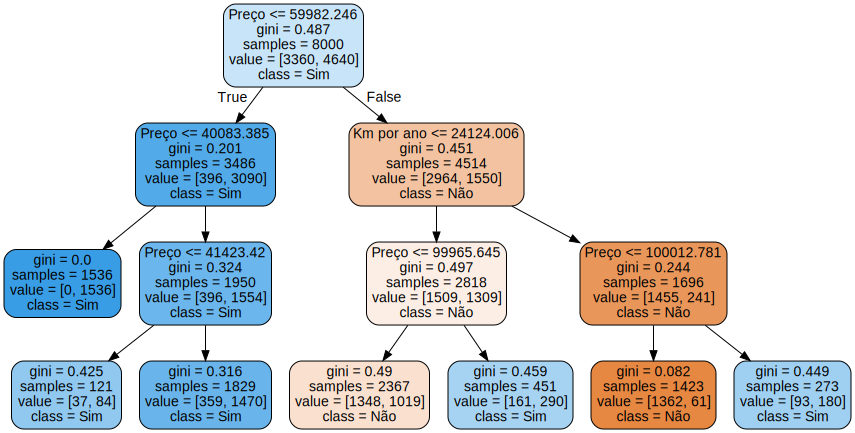

In [139]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True,
                           rounded = True,
                           feature_names = features,
                           class_names = ["Não", "Sim"])
grafico = graphviz.Source(dot_data)
grafico

In [117]:
print(f"Aumento relativo para árvore de decisão: {(acuracia_tree - acuracia_dummy_stratified)/acuracia_dummy_stratified:.2%}")

Aumento relativo para árvore de decisão: 38.19%
